<a href="https://colab.research.google.com/github/Kaushikeeb/Exploratory_data_analysis/blob/main/Da-1-Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  object 
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54807 non-null  float64
 11  avg_training_score    52247 non-null  float64
 12  is_promoted           54808 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 5.4+ MB
Dimensions of the dataset: (54808, 13)

Summary Statistics:
    

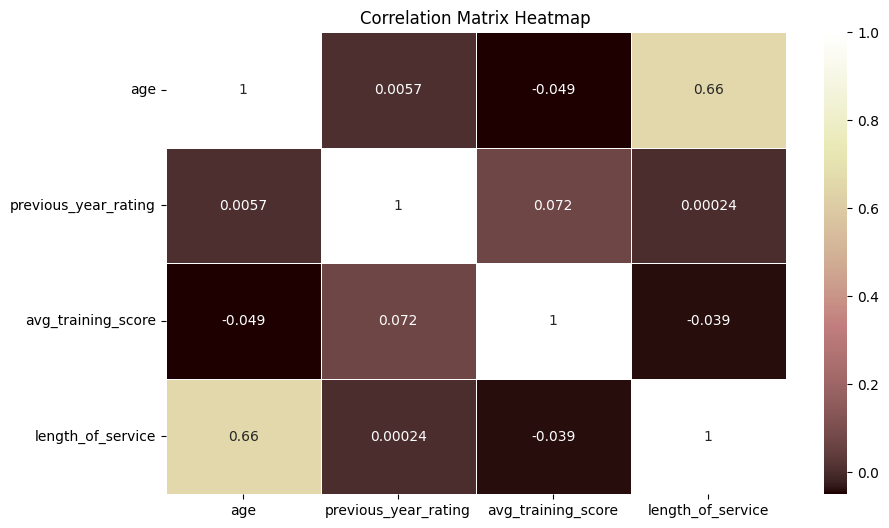

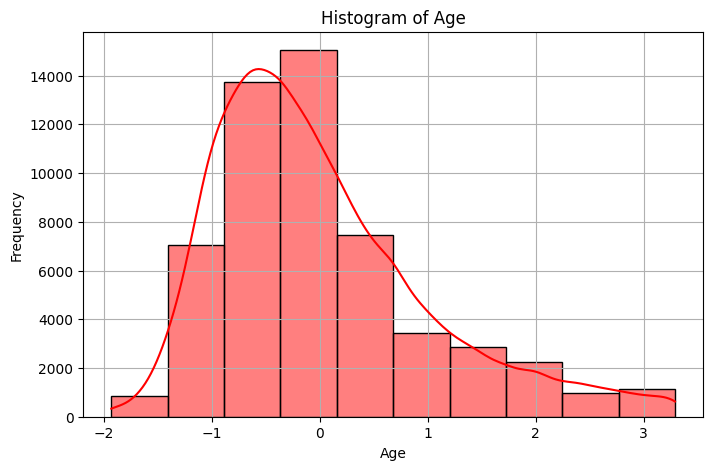

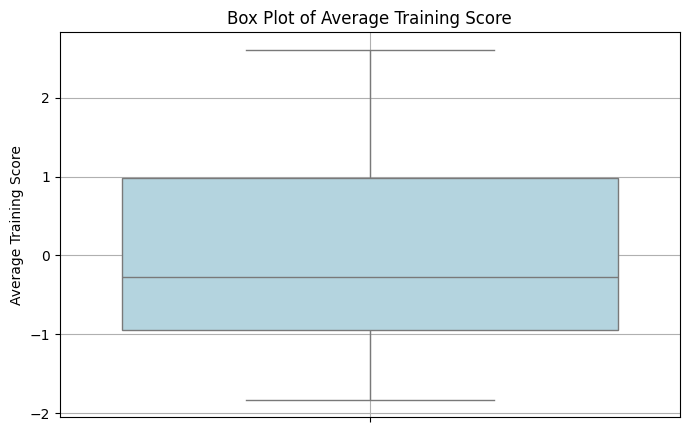

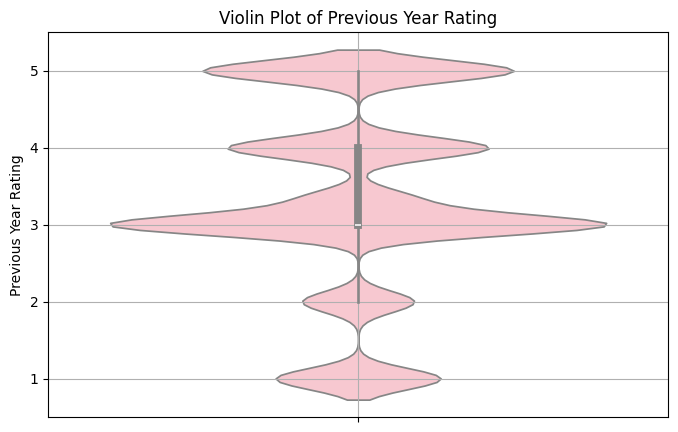

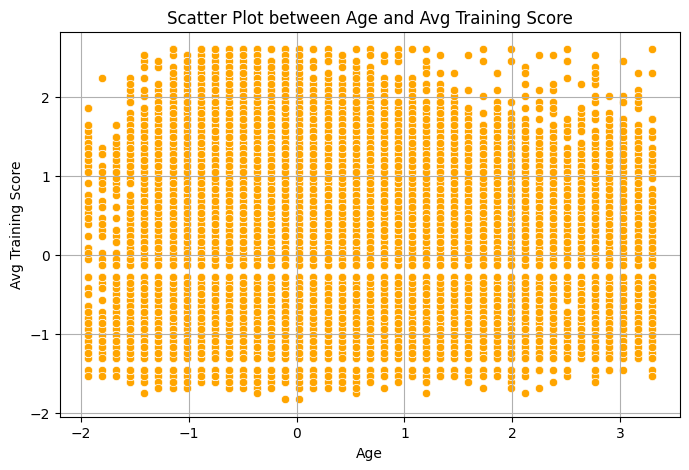

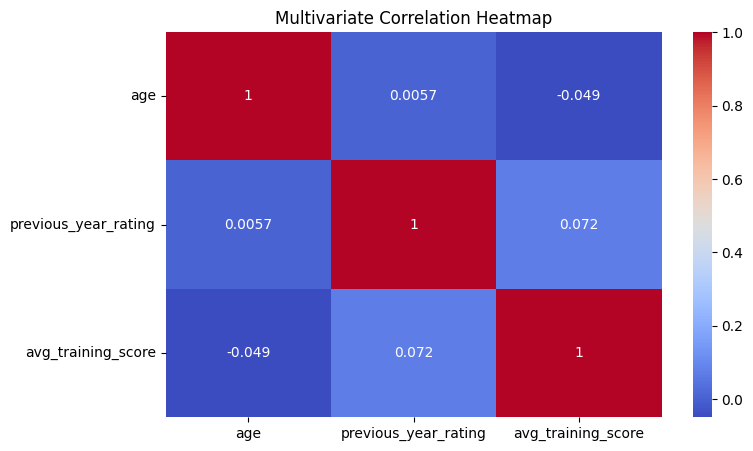

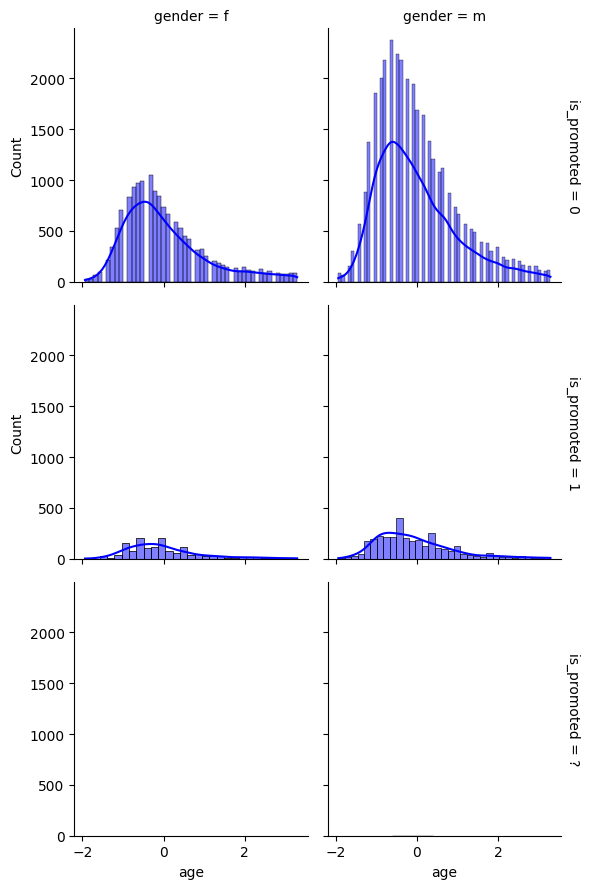

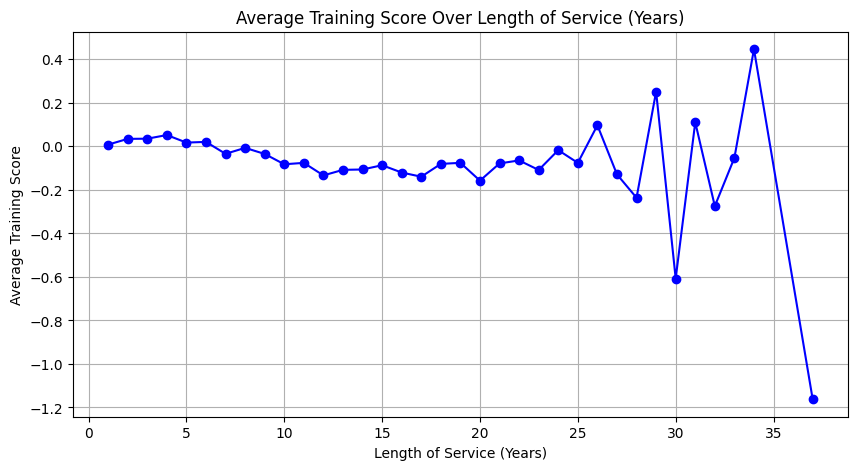

Mean of Average Training Score: -3.116367789527187e-16
Median of Average Training Score: -0.2745435725292234
Mode of Average Training Score: -1.0140853331041035
Quartiles of Average Training Score:
 0.25   -0.940131
0.50   -0.274544
0.75    0.982677
Name: avg_training_score, dtype: float64
Deciles of Average Training Score:
 0.1   -1.161994
0.2   -1.014085
0.3   -0.792223
0.4   -0.496406
0.5   -0.274544
0.6    0.169181
0.7    0.612907
0.8    1.204540
0.9    1.500357
Name: avg_training_score, dtype: float64
Quantiles of Average Training Score (10th and 90th):
 0.1   -1.161994
0.9    1.500357
Name: avg_training_score, dtype: float64
Range of Average Training Score: 4.437250563449281
Variance of Average Training Score: 1.000019140221261
Standard Deviation of Average Training Score: 1.0000095700648375
Interquartile Range (IQR) of Average Training Score: 1.9228085774946884
Skewness of Average Training Score: 0.419128755378491


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/employee_promotion.csv'
df = pd.read_csv(url)

df.head()

df.info()
print("Dimensions of the dataset:", df.shape)

# Summary statistics of the dataset
summary = df.describe(include='all')
print("\nSummary Statistics:")
print(summary)

# Fill missing values in 'previous_year_rating' with the mean
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(), inplace=True)

# Fill missing values in 'education' with the most frequent value (mode)
df['education'].fillna(df['education'].mode()[0], inplace=True)

#df.dropna(subset=['age', 'education'], inplace=True)  # Drop rows with NaN in 'age' or 'education'

# Discretization and Binning
# Discretize 'age' into bins
bins = [20, 30, 40, 50, 60]
labels = ['20-30', '30-40', '40-50', '50-60']
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print("DataFrame after binning 'age':\n", df[['age', 'age_group']].head(10))


# Z-score for detecting outliers
numeric_cols = ['age', 'previous_year_rating', 'avg_training_score']

# Calculate Z-scores for numeric columns
zscore = df[numeric_cols].apply(stats.zscore).abs()

# Filter rows where any Z-score is greater than 3 (outliers)
outliers = df[(zscore > 3).any(axis=1)]
print("Outliers detected:\n", outliers.head())


# Normalize 'age' and 'avg_training_score' using Min-Max scaling
scaler_min_max = MinMaxScaler()
df[['age', 'avg_training_score']] = scaler_min_max.fit_transform(df[['age', 'avg_training_score']])
print("Data after Min-Max normalization:\n", df[['age', 'avg_training_score']].head())

# Z-score normalization for 'age' and 'avg_training_score'
scaler_z = StandardScaler()
df[['age', 'avg_training_score']] = scaler_z.fit_transform(df[['age', 'avg_training_score']])
print("Data after Z-score normalization:\n", df[['age', 'avg_training_score']].head())

# Decimal scaling for 'no_of_trainings'
df['no_of_trainings_decimal'] = df['no_of_trainings'] / 10**np.ceil(np.log10(df['no_of_trainings'].abs().max()))
print("Data after Decimal scaling:\n", df[['no_of_trainings', 'no_of_trainings_decimal']].head())

# Correlation matrix for numeric columns
correlation_matrix = df[['age', 'previous_year_rating', 'avg_training_score', 'length_of_service']].corr()
print("Correlation matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='pink', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# univariate
# Histogram of 'age'
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=10, color='red', kde=True)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Univariate Analysis - Box Plot for 'avg_training_score'
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['avg_training_score'], color='lightblue')
plt.title("Box Plot of Average Training Score")
plt.ylabel("Average Training Score")
plt.grid(True)
plt.show()

# Univariate Analysis - Violin Plot for 'previous_year_rating'
plt.figure(figsize=(8, 5))
sns.violinplot(y=df['previous_year_rating'], color='pink')
plt.title("Violin Plot of Previous Year Rating")
plt.ylabel("Previous Year Rating")
plt.grid(True)
plt.show()



# Bivariate
# Scatter plot between 'age' and 'avg_training_score'
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['avg_training_score'], color='orange')
plt.title("Scatter Plot between Age and Avg Training Score")
plt.xlabel("Age")
plt.ylabel("Avg Training Score")
plt.grid(True)
plt.show()




# Multivariate
# Multivariate correlation heatmap for 'age', 'previous_year_rating', and 'avg_training_score'
plt.figure(figsize=(8, 5))
sns.heatmap(df[['age', 'previous_year_rating', 'avg_training_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Multivariate Correlation Heatmap")
plt.show()



# Multivariate Analysis - Facet Grid of 'age' distribution by 'gender' and 'is_promoted'
g = sns.FacetGrid(df, col='gender', row='is_promoted', margin_titles=True)
g.map(sns.histplot, 'age', kde=True, color='blue')
plt.show()


# Set 'length_of_service' as a proxy for time
df.set_index('length_of_service', inplace=True)

# Time Series Visualization of 'avg_training_score' over 'length_of_service'
plt.figure(figsize=(10, 5))
df['avg_training_score'].groupby(df.index).mean().plot(marker='o', color='blue')
plt.title('Average Training Score Over Length of Service (Years)')
plt.xlabel('Length of Service (Years)')
plt.ylabel('Average Training Score')
plt.grid(True)
plt.show()

mean_avg_training_score = df['avg_training_score'].mean()
print("Mean of Average Training Score:", mean_avg_training_score)


median_avg_training_score = df['avg_training_score'].median()
print("Median of Average Training Score:", median_avg_training_score)


mode_avg_training_score = df['avg_training_score'].mode()[0]
print("Mode of Average Training Score:", mode_avg_training_score)


quartiles = df['avg_training_score'].quantile([0.25, 0.5, 0.75])
print("Quartiles of Average Training Score:\n", quartiles)

deciles = df['avg_training_score'].quantile(np.arange(0.1, 1, 0.1))
print("Deciles of Average Training Score:\n", deciles)

quantiles = df['avg_training_score'].quantile([0.1, 0.9])
print("Quantiles of Average Training Score (10th and 90th):\n", quantiles)


range_avg_training_score = df['avg_training_score'].max() - df['avg_training_score'].min()
print("Range of Average Training Score:", range_avg_training_score)


variance_avg_training_score = df['avg_training_score'].var()
print("Variance of Average Training Score:", variance_avg_training_score)


std_dev_avg_training_score = df['avg_training_score'].std()
print("Standard Deviation of Average Training Score:", std_dev_avg_training_score)

IQR = quartiles[0.75] - quartiles[0.25]
print("Interquartile Range (IQR) of Average Training Score:", IQR)

skewness_avg_training_score = df['avg_training_score'].skew()
print("Skewness of Average Training Score:", skewness_avg_training_score)
